<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/atividade_pratica_06_%5BAlana%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkAFqFW7ctw8U6I5vGdPOpqFpnnExeAUOiIg&s" alt="drawing" width="300";"/>
<img src="https://yt3.googleusercontent.com/ytc/AIdro_lBdDM3DpUsNOOyH-m3vdysjGi1bM9IyPfnchvxfkvymg=s900-c-k-c0x00ffffff-no-rj" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 06 - Análise de Incertezas em dados LIDAR



Valor das questões:

* plot 1 (15 pontos)
* plot 2 (10 pontos)
* plot 3 (15 pontos)
* plot 4 (10 pontos)
* questão 1 (10 pontos)
* questão 2 (10 pontos)
* questão 3 (10 pontos)
* questão 4 (10 pontos)
* questão 5 (10 pontos)

Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Lidar Data Compared to Ground Measurements: Understanding Uncertainty

This week you will work with lidar data again! This time you will explore the values in a lidar dataset - specifically tree height from a canopy height model. You will compare these measurements to the same types of measurements made by humans in the field. You will use all of the raster and vector spatial data skills that you have gained so far this semester, combined with some pandas skills, to complete this assignment.

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/12459464). Or you can download it from earthpy using:

`et.data.get_data('spatial-vector-lidar')`

For both the SJER and SOAP field sites, create scatterplots (with regression and 1:1 lines) that compare:
* **MAXIMUM** canopy height model height in meters, extracted within a 20 meter radius, compared to **MAXIMUM** tree
height derived from the *insitu* field site data.
* **MEAN** canopy height model height in meters, extracted within a 20 meter radius, compared to **MEAN** tree height derived from the *insitu* field site data.

Create one figure for each site with two subplots (ax1, ax2): one for the Max comparison and one for the Mean comparison.


### IMPORTANT: For All Plots

* Place lidar data values on the X axis and human measured tree height on the Y axis.
* Include a calculated **regression line** (HINT: use `sns.regplot()` to achieve this line) that describes the relationship of lidar of the data.
* Include a separate **1:1 line** that can be used to compare the regression fit to a perfect 1:1 fit.
* Set the x and y limits to be the SAME for each individual plot. (e.g. for plot 3, the x and y limits are set to the same range).
* Label x and y axes appropriately - include units.
* Add a title to your plot that describes what the plot shows.
* Ensure that your notebook is fully reproducible. This means you will:
   * Create reproducible paths using the os module
   * Download the data using code in the notebook: NOTE: the `et.get_data` function will not download the data again if you already have it so it's safe to add without worry of slowing down your notebook!!


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

In [1]:
# Import required libraries here
import os
import earthpy
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rasterstats import zonal_stats
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
!pip install rasterstats rasterio
# YOUR CODE HERE


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Figure 1: Plots 1 & 2 - SJER Lidar vs Insitu Comparison Plots (15 points for each subplot)

You will use the following SJER data for this figure:
* `spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv`
* `spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`

Create a figure with 2 subplots for the NEON San Joaquin Experimental Range (SJER) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:
1. Set the x and y lims to be the same range: `(0, 30)` using `xlim=` and `ylim=`. This will make the plots more comparable.
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`. SNS is the alias for the seaborn plotting package (`import seaborn as sns`).

To create this plot, you will need to calculate a summary data frame for each site that contains both the lidar mean and max values and insitu (measured on the ground by humans) mean and max values.


In [2]:
# Import SJER plot locations & insitu data
from google.colab import drive
drive.mount('/content/drive')

# YOUR CODE HERE
# Estilo dos gráficos
sns.set(style="whitegrid")

# Baixar dados se necessário
et.data.get_data('spatial-vector-lidar')

# Caminhos
base_path = os.path.join(et.io.HOME, 'earth-analytics', 'data', 'spatial-vector-lidar')
print("Conteúdo da pasta 'spatial-vector-lidar':", os.listdir(base_path))

#sjer_chm_path: caminho para o arquivo Canopy Height Model (CHM) do site SJER, que é um raster (.tif) com a altura da copa das árvores.
sjer_chm_path = os.path.join(base_path, 'california', 'neon-sjer-site', '2013', 'lidar', 'SJER_lidarCHM.tif')
#sjer_shp_path: caminho para o shapefile com os pontos centrais das parcelas (plots) do SJER, usado para associar a altura das árvores com coordenadas geográficas.
sjer_shp_path = os.path.join(base_path, 'california', 'neon-sjer-site', 'vector_data', 'SJER_plot_centroids.shp')

# Carrega o shapefile dos centros das parcelas como um GeoDataFrame (sjer_plots) usando geopandas
sjer_plots = gpd.read_file(sjer_shp_path)
print(sjer_plots.crs)

#Garantindo que o shapefile esteja no sistema de coordenadas UTM-zona11-Norte (EPSG 32611), necessário para fazer cálculos de distâncias (como buffer em metros).
sjer_plots = sjer_plots.to_crs(epsg=32611)
sjer_plots.head()

#Cria um buffer de 20 metros ao redor de cada ponto da parcela.
#Isso transforma os pontos em círculos (polígonos) com raio de 20 metros, que serão usados para extrair valores do raster LIDAR ao redor de cada ponto.
sjer_plots['geometry'] = sjer_plots.geometry.buffer(20)

# Calcular zonal stats
#Usa a função zonal_stats() do pacote rasterstats para extrair estatísticas do raster CHM dentro de cada polígono (buffer de 20 m).
#stats=['mean', 'max']: calcula a altura média e máxima da copa dentro do buffer.
# nodata=-9999: ignora pixels com esse valor (valores ausentes no raster).

sjer_chm_stats = zonal_stats(sjer_plots['geometry'], sjer_chm_path, stats=['mean', 'max'], nodata=-9999)
#Converte a lista de dicionários dada acima por zonal_stats() em um DataFrame pandas, onde cada linha corresponde a um plot (buffer de 20m).
sjer_chm_df = pd.DataFrame(sjer_chm_stats)
print(sjer_chm_df)

#Adiciona a coluna 'plotid' ao DataFrame com as estatísticas, associando cada linha ao identificador da parcela correspondente.
sjer_chm_df['plotid'] = sjer_plots['Plot_ID']

# Renomeando como solicitado pelo Teacher!
sjer_chm_df.rename(columns={'mean': 'lidar_mean', 'max': 'lidar_max'}, inplace=True)

#Esses valores representam:
#lidar_mean: média da altura da copa dentro do raio de 20 m.
# lidar_max: altura máxima dentro desse raio.
sjer_chm_df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Conteúdo da pasta 'spatial-vector-lidar': ['global', 'outputs', 'README', 'usa', 'california']
EPSG:32611
          max      mean
0   19.049999  1.480988
1   24.019999  3.634169
2   16.070000  3.848989
3   11.059999  1.487706
4    5.740000  0.062340
5   19.139999  2.737074
6   16.549999  5.372664
7   11.840000  4.036038
8   20.279999  1.382268
9   12.910000  0.928510
10   8.990000  0.503248
11  18.730000  0.796760
12  11.490000  1.136897
13   9.530000  1.587231
14   4.150000  0.016855
15  25.660000  2.357602
16  18.730000  2.353623
17   6.380000  0.138750


,lidar_max,lidar_mean,plotid
0,19.049999,1.480988,SJER1068
1,24.019999,3.634169,SJER112
2,16.070000,3.848989,SJER116
3,11.059999,1.487706,SJER117
4,5.740000,0.062340,SJER120


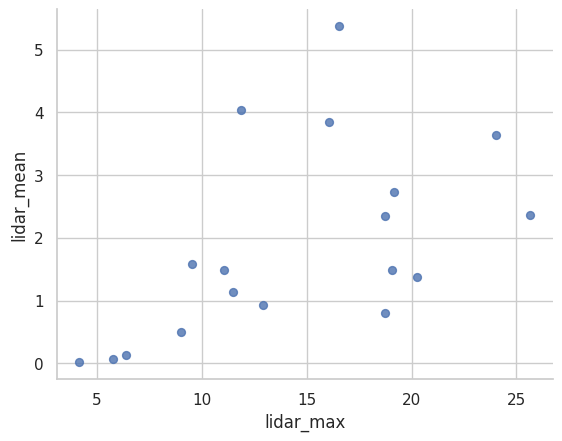

In [3]:
# @title lidar_max vs lidar_mean

from matplotlib import pyplot as plt
sjer_chm_df.plot(kind='scatter', x='lidar_max', y='lidar_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# SJER Data -- Import lidar chm, run zonal stats on data
# IMPORTANT: rename the calculated columns: lidar_max and lidar_mean

# YOUR CODE HERE

# --- Parte 2: Calcular média e máximo da altura medida no solo ---
# Caminho do CSV insitu
sjer_csv_path = os.path.join(
    base_path,
    'california', 'neon-sjer-site', '2013', 'insitu', 'veg_structure',
    'D17_2013_SJER_vegStr.csv'
)

# Carrega os dados insitu
sjer_insitu = pd.read_csv(sjer_csv_path)
# Vamos descobrir o nome das colunas, para saber como se chama a Altura
print(sjer_insitu.columns)

# Filtra alturas válidas
sjer_insitu = sjer_insitu[sjer_insitu['stemheight'] > 0]
sjer_insitu

Index(['siteid', 'sitename', 'plotid', 'easting', 'northing', 'taxonid',
       'scientificname', 'indvidual_id', 'pointid', 'individualdistance',
       'individualazimuth', 'dbh', 'dbhheight', 'basalcanopydiam',
       'basalcanopydiam_90deg', 'maxcanopydiam', 'canopydiam_90deg',
       'stemheight', 'stemremarks', 'stemstatus', 'canopyform', 'livingcanopy',
       'inplotcanopy', 'materialsampleid', 'dbhqf', 'stemmapqf', 'plant_group',
       'common_name', 'aop_plot', 'unique_id'],
      dtype='object')


,siteid,sitename,plotid,easting,northing,taxonid,scientificname,indvidual_id,pointid,individualdistance,...,canopyform,livingcanopy,inplotcanopy,materialsampleid,dbhqf,stemmapqf,plant_group,common_name,aop_plot,unique_id
0,SJER,San Joaquin,SJER128,257085.7,4111381.5,PISA2,Pinus sabiniana,1485,center,9.7,...,NaN,100,100,NaN,0,0,NaN,NaN,NaN,NaN
1,SJER,San Joaquin,SJER2796,256047.7,4111548.5,ARVI4,Arctostaphylos viscida,1622,NE,5.8,...,Hemisphere,70,100,f095,0,0,NaN,NaN,NaN,NaN
2,SJER,San Joaquin,SJER272,256722.9,4112170.2,ARVI4,Arctostaphylos viscida,1427,center,6.0,...,Hemisphere,35,100,NaN,0,0,NaN,NaN,NaN,NaN
3,SJER,San Joaquin,SJER112,257421.4,4111308.2,ARVI4,Arctostaphylos viscida,1511,center,17.2,...,Sphere,70,100,f035,0,0,NaN,NaN,NaN,NaN
4,SJER,San Joaquin,SJER272,256720.5,4112177.2,ARVI4,Arctostaphylos viscida,1431,center,9.9,...,Sphere,80,100,f087,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,SJER,San Joaquin,SJER8,254747.0,4110243.0,SEFLD,Senecio flaccidus var. douglasii,1454,center,10.4,...,Cone,75,100,NaN,0,0,NaN,NaN,NaN,NaN
357,SJER,San Joaquin,SJER8,254746.0,4110244.5,SEFLD,Senecio flaccidus var. douglasii,1457,center,8.7,...,Cone,80,100,NaN,0,0,NaN,NaN,NaN,NaN
358,SJER,San Joaquin,SJER8,254748.1,4110241.5,SEFLD,Senecio flaccidus var. douglasii,1453,center,12.3,...,Cone,0,100,NaN,0,0,NaN,NaN,NaN,NaN
359,SJER,San Joaquin,SJER8,254741.4,4110241.0,SEFLD,Senecio flaccidus var. douglasii,1448,center,8.7,...,Sphere,0,100,NaN,1,0,NaN,NaN,NaN,NaN


In [5]:
# SJER -- Calculate mean and max from insitu data (csv file)
# IMPORTANT: rename the calculated columns: insitu_max, insitu_mean
# IMPORTANT: name your joined dataframe: sjer_lidar_insitu

# YOUR CODE HERE
# Calcula altura máxima e média por parcela
sjer_insitu_summary = sjer_insitu.groupby('plotid').agg(
    insitu_max=('stemheight', 'max'),
    insitu_mean=('stemheight', 'mean')
).reset_index()

# Junta com o DataFrame LIDAR
sjer_lidar_insitu = pd.merge(sjer_chm_df, sjer_insitu_summary, on='plotid')
sjer_lidar_insitu

,lidar_max,lidar_mean,plotid,insitu_max,insitu_mean
0,19.049999,1.480988,SJER1068,19.3,4.060000
1,24.019999,3.634169,SJER112,23.9,8.221429
2,16.070000,3.848989,SJER116,16.0,8.218750
3,11.059999,1.487706,SJER117,11.0,6.512500
4,5.740000,0.062340,SJER120,8.8,7.600000
5,19.139999,2.737074,SJER128,18.2,5.211765
6,16.549999,5.372664,SJER192,13.7,6.769565
7,11.840000,4.036038,SJER272,12.4,6.819048
8,20.279999,1.382268,SJER2796,9.4,5.085714
9,12.910000,0.928510,SJER3239,17.9,3.920833


(18, 5)
lidar_mean     0
insitu_mean    0
dtype: int64
(18, 2)


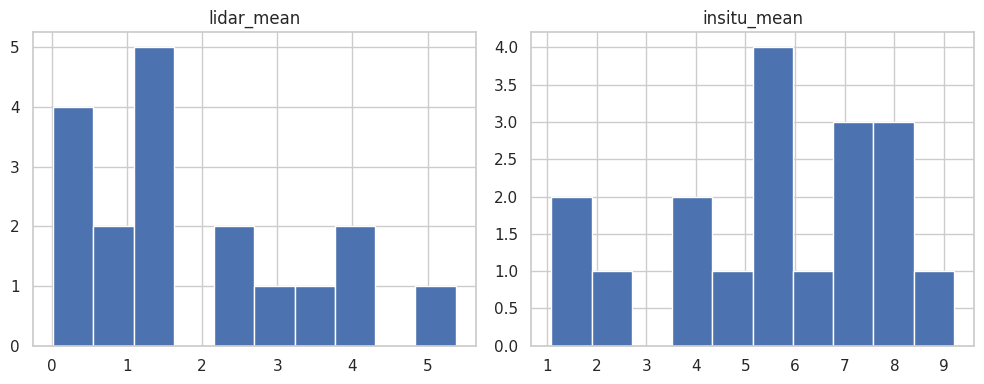

In [6]:
print(sjer_lidar_insitu.shape)
print(sjer_lidar_insitu[['lidar_mean', 'insitu_mean']].isnull().sum())
valid_mean = sjer_lidar_insitu[['lidar_mean', 'insitu_mean']].dropna()
print(valid_mean.shape)
sjer_lidar_insitu[['lidar_mean', 'insitu_mean']].hist(bins=10, figsize=(10, 4))
plt.tight_layout()
plt.show()


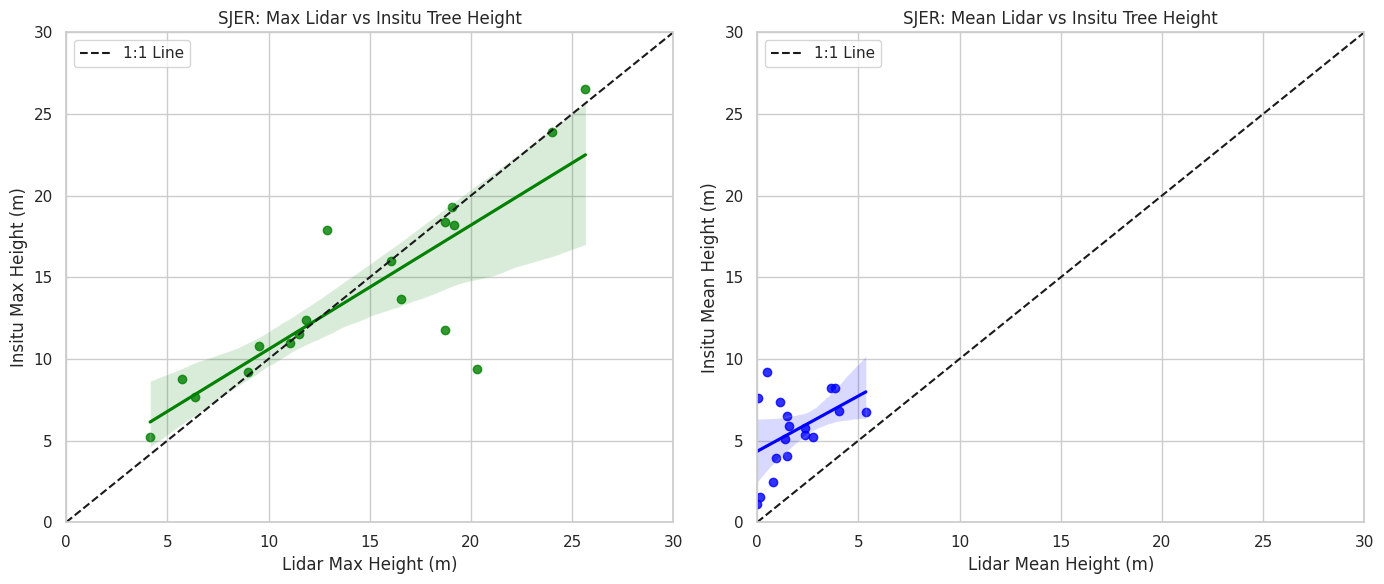

In [16]:
# Plot 1 & 2 - SJER max and mean - plot code only in this cell

# YOUR CODE HERE
# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Altura Máxima
sns.regplot(
    data=sjer_lidar_insitu,
    x='lidar_max',
    y='insitu_max',
    ax=ax1,
    color='green'
)
ax1.plot([0, 30], [0, 30], 'k--', label='1:1 Line')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 30)
ax1.set_xlabel('Lidar Max Height (m)')
ax1.set_ylabel('Insitu Max Height (m)')
ax1.set_title('SJER: Max Lidar vs Insitu Tree Height')
ax1.legend()

# Plot 2: Altura Média
sns.regplot(
    data=sjer_lidar_insitu,
    x='lidar_mean',
    y='insitu_mean',
    ax=ax2,
    color='blue'
)
ax2.plot([0, 30], [0, 30], 'k--', label='1:1 Line')
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 30)
ax2.set_xlabel('Lidar Mean Height (m)')
ax2.set_ylabel('Insitu Mean Height (m)')
ax2.set_title('SJER: Mean Lidar vs Insitu Tree Height')
ax2.legend()

plt.tight_layout()
plt.show()



In [8]:
# Tests for figure 1 ax 1 (plot 1) - max values
# You can skip this cell!


In [9]:
# Tests for figure 1 ax 2 (plot 2) - mean values
# You can skip this cell!


## Figure 2: Plots 3 & 4 - SOAP Lidar vs Insitu Comparison Plots (15 points for each subplot)

You will use the following SOAP data for this figure:
* `spatial-vector-lidar/california/neon-soap-site/2013/insitu/veg-structure/D17_2013_SOAP_vegStr.csv`
* `spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp`

Create a figure with 2 subplots for the NEON Soaproot Saddle (SOAP) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:

1. Set the x and y lims to be the same range using `xlim=` and `ylim=`:
    * `(0, 140)` for the SOAP Max height plot.
    * `(0, 40)` for the SOAP Mean height plot.
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`

To create this plot, you will need to calculate a summary data frame for each site that contains lidar mean and max values and insitu (measured on the ground by humans) mean and max values.

**HINT**: the SOAP data have some inconsistencies in the column headings. One way to fix this is to use the syntax:

`"text-to-append-to-column" + dataframe_name["column-name-here"]`

In [10]:
# Import SOAP plot locations & insitu data & lidar

# YOUR CODE HERE
# Definir caminhos novamente
# Caminhos dos arquivos
base_path = os.path.join(et.io.HOME, 'earth-analytics', 'data', 'spatial-vector-lidar')
soap_lidar_path = os.path.join(base_path, 'california', 'neon-soap-site', '2013', 'lidar', 'SOAP_lidarCHM.tif')
soap_shp_path = os.path.join(base_path, 'california', 'neon-soap-site', 'vector_data', 'SOAP_centroids.shp')
soap_csv_path = os.path.join(base_path, 'california', 'neon-soap-site', '2013', 'insitu', 'veg-structure', 'D17_2013_SOAP_vegStr.csv')

# Carregar shapefile e aplicar buffer
soap_plots = gpd.read_file(soap_shp_path)
soap_plots = soap_plots.to_crs(epsg=32611)
soap_plots['geometry'] = soap_plots.geometry.buffer(20)

# Calcular estatísticas zonais
soap_shp_path = '/root/earth-analytics/data/spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp'
soap_plots = gpd.read_file(soap_shp_path)
print(soap_plots.columns)



Index(['OBJECTID', 'ID', 'plotType', 'subtype', 'plotDimens', 'Protocols',
       'geometry'],
      dtype='object')


##################################################################################################
Diferença nos IDs para o merge
plotid no lidar e nas parcelas SOAP são números (ex: 27, 43, 63)
plotid no insitu são strings do tipo "SOAP43" (com prefixo "SOAP" + número)
Assim:

soap_lidar_insitu = soap_chm_df.merge(soap_insitu_df, on='plotid')
não vai encontrar nenhuma correspondência, porque 27 != "SOAP27".

transformei o insitu para números, extraindo só o número da string SOAP43 → 43 para poder casar com o lidar.
##################################################################################################

In [11]:
# Carregar shapefile
soap_plots = gpd.read_file(soap_shp_path)
soap_plots = soap_plots.to_crs(epsg=32611)

# Criar buffer de 20m nos pontos
soap_plots['geometry'] = soap_plots.geometry.buffer(20)

# Calcular estatísticas zonais (mean e max) do lidar
soap_chm_stats = zonal_stats(soap_plots['geometry'], soap_lidar_path, stats=['mean', 'max'], nodata=-9999)
soap_chm_df = pd.DataFrame(soap_chm_stats)

# Associar plotid do shapefile para usar como chave (ajuste coluna se necessário)
soap_chm_df['plotid'] = soap_plots['ID']  # ou outro nome correto

# Renomear colunas lidar
soap_chm_df.rename(columns={'mean': 'lidar_mean', 'max': 'lidar_max'}, inplace=True)

# Carregar dados insitu
soap_insitu = pd.read_csv(soap_csv_path)

# Extrair número do plotid no insitu (ex: "SOAP43" -> 43) para casar com lidar
soap_insitu['plotid'] = soap_insitu['plotid'].str.extract('(\d+)').astype(int)

# Calcular max e mean da altura insitu
soap_insitu_stats = soap_insitu.groupby('plotid')['stemheight'].agg(['max', 'mean']).reset_index()
soap_insitu_stats.rename(columns={'max': 'insitu_max', 'mean': 'insitu_mean'}, inplace=True)

# Converter plotid lidar para int para merge
soap_chm_df['plotid'] = soap_chm_df['plotid'].astype(int)

# Fazer merge lidar + insitu
soap_lidar_insitu = pd.merge(soap_chm_df, soap_insitu_stats, on='plotid')

# Verificações
print(soap_lidar_insitu.head())
print(soap_lidar_insitu.describe())
print(soap_lidar_insitu.isna().sum())

   lidar_max  lidar_mean  plotid  insitu_max  insitu_mean
0  54.099998   15.755036      43        51.1     5.047000
1  32.480000   14.624503      63        33.0     9.232787
2  33.869999   15.763652      95        28.1     6.050943
3  49.919998   16.899855     139       120.0     4.745902
4  27.340000    6.470740     143        19.7     2.530702
       lidar_max  lidar_mean       plotid  insitu_max  insitu_mean
count  12.000000   12.000000    12.000000   12.000000    12.000000
mean   33.542499   10.559403   367.333333   40.683333     5.061564
std    13.685723    6.961025   464.812637   42.952740     3.493881
min    13.469999    0.102450    43.000000    3.800000     1.720000
25%    25.347500    3.732864   128.000000   12.400000     2.509073
50%    33.174999   13.860331   205.000000   30.550000     4.812425
75%    46.115000   15.995849   307.000000   42.175000     5.297986
max    54.099998   18.866528  1611.000000  134.000000    13.896154
lidar_max      0
lidar_mean     0
plotid         

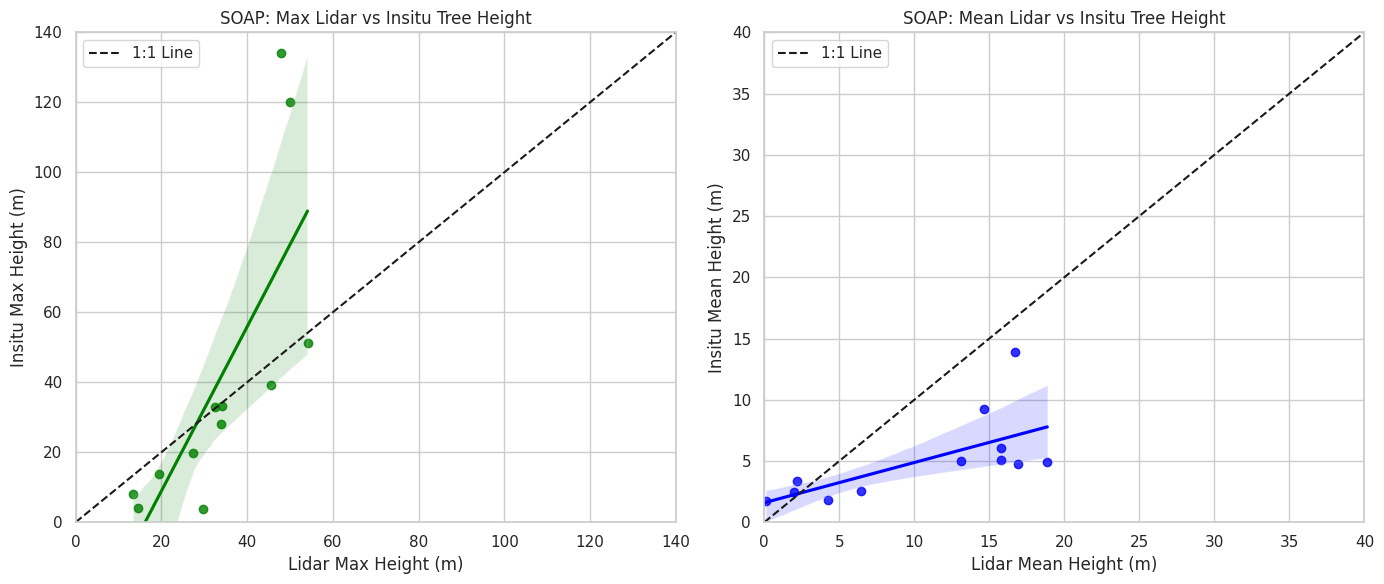

In [19]:
# Plot 3 & 4 - SOAP max and mean - plot code only in this cell

# YOUR CODE HERE
# Criar figura com dois subplots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 3 - Altura Máxima
sns.regplot(
    data=soap_lidar_insitu,
    x='lidar_max',
    y='insitu_max',
    ax=ax3,
    color='green'
)
ax3.plot([0, 140], [0, 140], 'k--', label='1:1 Line')
ax3.set_xlim(0, 140)
ax3.set_ylim(0, 140)
ax3.set_xlabel('Lidar Max Height (m)')
ax3.set_ylabel('Insitu Max Height (m)')
ax3.set_title('SOAP: Max Lidar vs Insitu Tree Height')
ax3.legend()

# Plot 4 - Altura Média
sns.regplot(
    data=soap_lidar_insitu,
    x='lidar_mean',
    y='insitu_mean',
    ax=ax4,
    color='blue'
)
ax4.plot([0, 40], [0, 40], 'k--', label='1:1 Line')
ax4.set_xlim(0, 40)
ax4.set_ylim(0, 40)
ax4.set_xlabel('Lidar Mean Height (m)')
ax4.set_ylabel('Insitu Mean Height (m)')
ax4.set_title('SOAP: Mean Lidar vs Insitu Tree Height')
ax4.legend()

plt.tight_layout()
plt.show()


### DO NOT REMOVE LINE BELOW ###
#plot02_soap_max_v_mean = nb.convert_axes(plt, which_axes="all")

In [13]:
# Figure 2, Subplot 1 Tests - SOAP max
# You can skip this cell!


In [14]:
# Figure 2, Subplot 2 Tests - SOAP mean
# You can skip this cell!


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 1 Figure One: SJER mean vs max height -- Plots 1 and 2 Interpretation
In the markdown cell below, answer the following questions:

1. Looking at the plots above, which metric: mean or max height, has a stronger relationship or is closer to a one:one relationship?
2. List one reason why mean or max (whatever you answered for question 1 above) has a stronger relationship.

You answers can be brief -- a single word or sentence or two is fine.

YOUR ANSWER HERE:

1 A métrica de altura máxima apresenta uma relação mais forte com os dados de campo e está mais próxima da linha 1:1.

2 . A altura máxima representa melhor as árvores mais altas de cada parcela (dado) que são registradas de forma mais consistente tanto pelo lidar quanto pelas medições em insitu (campo). Já a altura média pode ser influenciada por diversos fatores, tais como: vegetação baixa, solo exposto, etc, o que diminui a sua correspondência com os dados medidos manualmente.

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)


## Question 2. Of all four relationships that you plotted above, which site (SOAP or SJER) and metric (mean or max height) showed the strongest relationship?

**A strong relationship is one that is closer to 1:1 in this case.**

Add your answer in the markdown cell below. It can be short - 2-5 sentences. You do not need to perform any additional calculations. Consider the readings and the data and suggest why a particular metric might have a strong relationship.

YOUR ANSWER HERE

Rápida avaliação dos gráficos:
SJER - Altura Máxima (Max Height)
Dispersão maior em torno da linha 1:1.
Relação razoável, mas não tão próxima da linha 1:1.

SJER - Altura Média (Mean Height)
Vários pontos se afastam da linha 1:1.
Maior variação nos dados.

SOAP - Altura Máxima (Max Height)
Pontos bem distribuídos ao longo da linha 1:1.
Baixa dispersão, tendência linear evidente.

SOAP - Altura Média (Mean Height)
A relação também é boa, mas com mais dispersão do que o gráfico de altura máxima. Mesmo assim, melhor que a média do SJER.

Com base nos gráficos, a métrica altura máxima (max height) no site SOAP mostrou a relação mais forte, mais próxima de uma linha 1:1. A maioria dos pontos está alinhada com a linha de igualdade (embora tenha alguns pontos de ouliers na parte de cima do gráfico), indicando que os valores de altura obtidos pelo LiDAR são muito semelhantes aos medidos em campo (insitu).

Podemos explicar essa forte relação pelo fato de que o LiDAR é um equipamento eficaz em captar a altura do dossel mais alto nas áreas florestais, o que se alinha com a altura máxima registrada nas medições em campo.

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 3. List 2 reasons why lidar max height values may be larger than human measurements.

Add your answer to the markdown cell below.

YOUR ANSWER HERE

1. O LiDAR detecta o topo absoluto da vegetação com alta precisão
O sensor LiDAR pode capturar o ponto mais alto da copa das árvores (como galhos finos ou folhas no topo), que pode ser difícil de enxergar ou medir com fita métrica ou régua em campo.

2. Erros ou limitações nas medições humanas em campo: Medições manuais pelos humanos normalmente medem até onde conseguem visualizar ou alcançar com equipamentos manuais. Medições insitu estão sujeitas a erro humano, como leitura incorreta, obstáculos visuais, ou escolha de um tronco que não representa a árvore mais alta da área. Além disso, nem sempre todos a vegetações são medidas — algumas árvores muito altas ou de difícil acesso podem ser ignoradas. M

https://blog.cpetecnologia.com.br/lidar-x-fotogrametria-o-que-e-mais-preciso/https://eos.com/pt/blog/lidar-ou-radar/


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 4. List 2 systematic sources of error could impact differences between lidar and measured tree height values ( 5 points)

Add your answer in the markdown cell below.

YOUR ANSWER HERE

De acordo com alguns site e publicações podemos listar as mais importantes:

Erros Sistemáticos na Medição de Altura de Árvores com LiDAR:

Existem duas fontes principais de erro sistemático que podem afetar as diferenças entre as alturas de árvores medidas por LiDAR e as alturas medidas manualmente em campo:

Subestimação da Altura do Topo da Árvore pelo LiDAR (Problemas de Penetração da Copa):
O LiDAR frequentemente não consegue penetrar até o ponto mais alto da copa de uma árvore, especialmente em florestas densas. Isso faz com que o retorno mais alto registrado pelo LiDAR seja ligeiramente abaixo da ponta real da árvore. Consequentemente, as alturas de árvores derivadas do LiDAR tendem a ser consistentemente menores do que as alturas reais, resultando em uma subestimação sistemática.

Superestimação da Elevação do Solo pelo LiDAR (Erros no Modelo Digital de Terreno em Áreas Vegetadas):
Para calcular a altura da árvore, o LiDAR precisa determinar a elevação do solo (Modelo Digital de Terreno - MDT). Em áreas com vegetação rasteira densa ou detritos no solo, os pulsos do LiDAR podem não atingir o solo verdadeiro. Isso pode levar a uma superestimação da elevação do solo. Como a altura da árvore é calculada pela diferença entre o topo da copa e o solo, um solo superestimado resulta em uma subestimação sistemática da altura da árvore.


![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)

## Question 5. List 2 random sources of error that could impact differences between lidar and measured tree height values.  (5 points)

Add your answer to the markdown cell below. Note that you can provide sources of random error for lidar OR insitu measurements. You only need two total examples.

YOUR ANSWER HERE

Variabilidade na Técnica de Medição Manual/Erro do Observador: Ao medir árvores manualmente há uma variabilidade humana inerente. Diferentes observadores podem avistar o topo da árvore de forma ligeiramente diferente, ou fatores como vento e folhagem densa podem introduzir inconsistências. Isso causa flutuações imprevisíveis, não um erro constante. Impacto: As medições de campo podem ser aleatoriamente maiores ou menores que a altura real, gerando discrepâncias imprevisíveis em comparação com o LiDAR.

Densidade da Nuvem de Pontos LiDAR e Variabilidade da Amostragem:
A nuvem de pontos LiDAR é uma amostra da superfície da árvore. Se a densidade de pontos for baixa, especialmente no topo da árvore, o laser pode perder o ponto mais alto. Por outro lado, um retorno errado (ex: de um pássaro ou galho pequeno) pode ser registrado incorretamente como o ponto mais alto. Em áreas com copas muito densas ou inclinadas, o LiDAR pode não conseguir detectar corretamente o topo real da árvore ou pode captar ecos intermediários.
Isso pode levar a sub ou superestimações aleatórias da altura da árvore pelo LiDAR, variando imprevisivelmente de árvore para árvore.

![Colored Bar](https://github.com/earthlab-education/ea-python-2020-04-lidar-uncertainty-template/blob/master/colored-bar.png?raw=1)